#### We are going to use a LSTM model to predict the downward and upward trend of Microsoft stocks price. Our training data is the stock price of January 2009 through the end of August 2018 and we are going to predict the stock price of September 2018 and then compare them with the real values.

#### Part 1 - Data Preprocessing

#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Importing the training set

In [2]:
dataset_train = pd.read_csv('Data/Microsoft_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

#### Feature Scaling

#### Feature Scaling is very important as want the values to be between 0 and 1.

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

#### Creating a data structure with 60 timesteps and 1 output. You need to examine several timestamps. We examined 1, 20, 40 and the 60 and 60 turned out to be the best fit. We have X_train which is for the 60 days before a financial day and y_train is for the exact financial day.

In [4]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

#### Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#### Part 2 - Building the RNN

#### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


#### Initialising the RNN

In [7]:
regressor = Sequential()

#### We need to add dropout regularization to avoid overfitting. We make the dimentionality high by including a hight number there. Too small units won't  capture the upward or downward of the stock prize.

#### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#### Adding a fifth LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#### Adding the output layer

In [13]:
regressor.add(Dense(units = 1))

#### Compiling the RNN

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#### Fitting the RNN to the Training set

#### Adam stands for  A Method for Stochastic Optimization based on the article written by Diederik Kingma, Jimmy Ba in 2014. Computing the loss function in this LSTM method heavily depends on the paper.



#### epoch is how many times you want the naural network to be trained and back propagated and we want the loss to converge on the last 20 steps. Tested the epochs for 50 and the loss for the last 20 was not stable. Then I tried echops to be 100 and the loss while less than 0.0001 was pretty stable.

In [15]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2373/2373 [==============================] - 20s 8ms/step - loss: 0.0130
Epoch 2/100
2373/2373 [==============================] - 16s 7ms/step - loss: 0.0019
Epoch 3/100
2373/2373 [==============================] - 16s 7ms/step - loss: 0.0018
Epoch 4/100
2373/2373 [==============================] - 16s 7ms/step - loss: 0.0017
Epoch 5/100
2373/2373 [==============================] - 16s 7ms/step - loss: 0.0015
Epoch 6/100
2373/2373 [==============================] - 16s 7ms/step - loss: 0.0021
Epoch 7/100
2373/2373 [==============================] - 16s 7ms/step - loss: 0.0015
Epoch 8/100
2373/2373 [==============================] - 16s 7ms/step - loss: 0.0019
Epoch 9/100
2373/2373 [==============================] - 16s 7ms/step - loss: 0.0013
Epoch 10/100
2373/2373 [==============================] - 16s 7ms/step - loss: 0.0013
Epoch 11/100
2373/2373 [==============================] - 16s 7ms/step - loss: 0.0012
Epoch 12/100
2373/2373 [==============================] - 16s 7

2373/2373 [==============================] - 18s 8ms/step - loss: 6.0026e-04
Epoch 94/100
2373/2373 [==============================] - 16s 7ms/step - loss: 5.7282e-04
Epoch 95/100
2373/2373 [==============================] - 16s 7ms/step - loss: 5.4968e-04
Epoch 96/100
2373/2373 [==============================] - 17s 7ms/step - loss: 6.2362e-04
Epoch 97/100
2373/2373 [==============================] - 16s 7ms/step - loss: 5.5202e-04
Epoch 98/100
2373/2373 [==============================] - 17s 7ms/step - loss: 5.3183e-04
Epoch 99/100
2373/2373 [==============================] - 16s 7ms/step - loss: 6.0359e-04
Epoch 100/100
2373/2373 [==============================] - 16s 7ms/step - loss: 5.1243e-04


#### Getting the real stock price of September 2018.

In [17]:
dataset_test = pd.read_csv('Data/Microsoft_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

#### We concatinate the training and the test set.

In [18]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 60 + len(dataset_test['Open'])):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#### Visualising the results

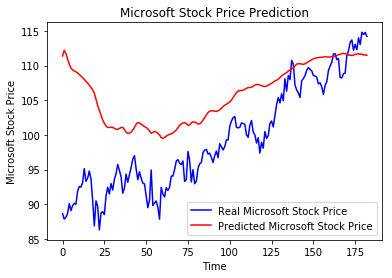

In [19]:
plt.plot(real_stock_price, color = 'blue', label = 'Real Microsoft Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Microsoft Stock Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show()